<a href="https://colab.research.google.com/github/justingrammens/machine_learning/blob/master/ML_Foundations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Prepare the Data Section:

Step 1: import the pandas package - one of the most powerful and popular python libraries for working with data. It turns raw information, like a CSV or google sheet, into a structure, easy to analyze format.

This step is reading in our file directly and then asking it to describe it for us, What do you Notice?



In [ ]:
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264628 entries, 0 to 264627
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         264628 non-null  object 
 1   County                                             264619 non-null  object 
 2   City                                               264619 non-null  object 
 3   State                                              264628 non-null  object 
 4   Postal Code                                        264619 non-null  float64
 5   Model Year                                         264628 non-null  int64  
 6   Make                                               264628 non-null  object 
 7   Model                                              264628 non-null  object 
 8   Electric Vehicle Type                              264628 non-null  object

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,264619.000000,264628.000000,264624.000000,264624.000000,263969.000000,2.646280e+05,2.646190e+05
mean,98170.770500,2021.842556,41.713159,678.902197,28.862897,2.422540e+08,5.297109e+10
std,2637.717847,3.044095,80.377977,6868.919926,14.883356,6.516028e+07,1.638317e+09
min,1469.000000,1999.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2021.000000,0.000000,0.000000,17.000000,2.174474e+08,5.303301e+10
50%,98133.000000,2023.000000,0.000000,0.000000,32.000000,2.603598e+08,5.303303e+10
75%,98382.000000,2024.000000,34.000000,0.000000,42.000000,2.758921e+08,5.305307e+10
max,99577.000000,2026.000000,337.000000,845000.000000,49.000000,4.791150e+08,6.601095e+10


Run code below for a quick visual using matplotlib, Python's foundational data visualization library, it lets us turn numbers and tables into visuals.

What is the visual below showing you?

<Axes: xlabel='Electric Range', ylabel='Count'>

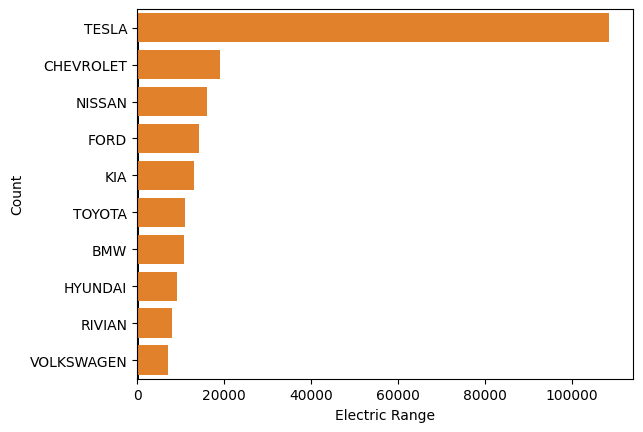

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df["Electric Range"].dropna())
sns.countplot(y="Make", data=df, order=df["Make"].value_counts().head(10).index)

##Step 2: Exploring Models
Next lets see if we can start addressing our business problem with the variety of data we have and models available.

The lines of code in this next block are establishing what we are trying to predict y. And which features can help us predict.

For this example and simplicity, we are keeping at 2 features (Model Year, Electric Range).

In [ ]:
df["is_BEV"] = df["Electric Vehicle Type"].apply(lambda x: 1 if "Battery" in x else 0)
df = df.dropna(subset=["Model Year", "Electric Range"])
X = df[["Model Year", "Electric Range"]]
y = df["is_BEV"]


NameError: name 'df' is not defined

Now that we have the x and y defined we will be testing out our first model. AS we are looking to classify something, we are going to start with a Logistic Regression model (supervised).

The model needs a training data set and a testing data set, which you will see in the model below. Then we are asking the model to create a "fit" or line across the training data.

Once the model has been fit - then we feed the remaining data in as testing data, to "test" our model.

An output of the report will come

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8065198770595052
              precision    recall  f1-score   support

           0       0.78      0.07      0.13     16178
           1       0.81      0.99      0.89     63210

    accuracy                           0.81     79388
   macro avg       0.79      0.53      0.51     79388
weighted avg       0.80      0.81      0.74     79388



As Accuracy Is not Enough for Us, we must run an ROC curve to see the true nature of the model!

We use matplot library again for pyplot to get the ROC curve visual out.

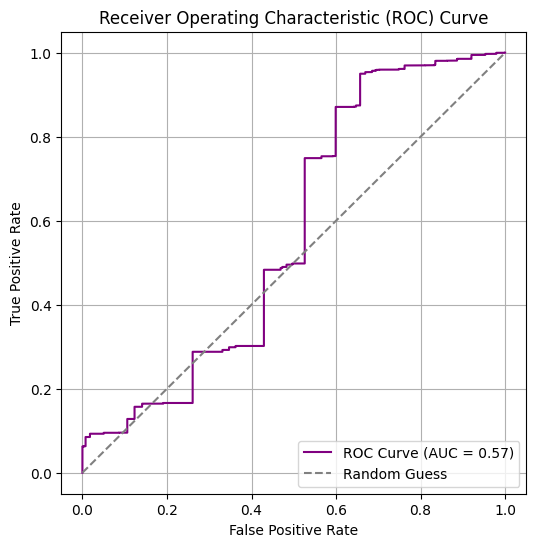

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 1. Get model-predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# 2. Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# 3. Compute the Area Under the Curve (AUC)
auc = roc_auc_score(y_test, y_prob)

# 4. Plot the ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='purple', label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
